In [1]:
import numpy as np

In [2]:
bounds = (-5, 5)

In [3]:
best_x = np.random.uniform(bounds[0], bounds[1])
best_y = np.random.uniform(bounds[0], bounds[1])


In [4]:
best_x, best_y

(1.410902684640992, 0.6435085836142704)

Sum of radii: 2.2816192387478003


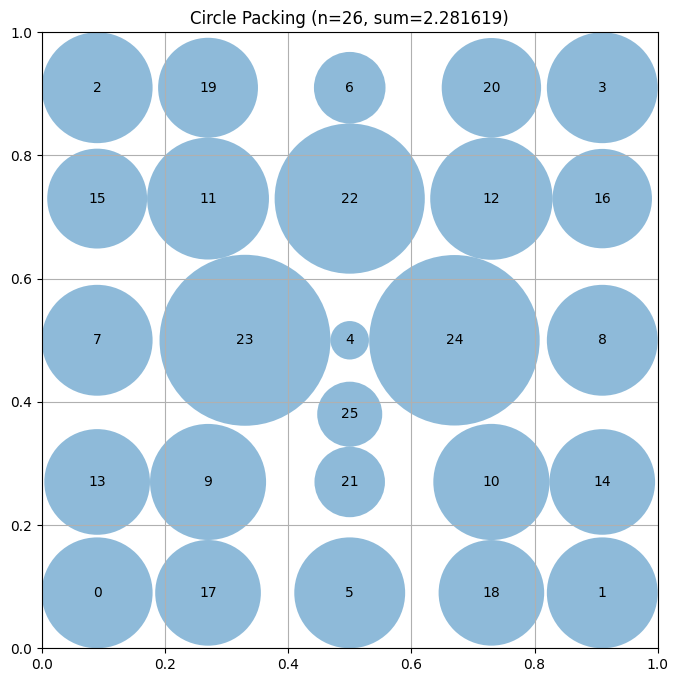

In [3]:
import sys
import os
# Add the project root to Python path
sys.path.insert(0, '/home/jake/openevolve')

from examples.circle_packing.openevolve_output.best.best_program import run_packing, visualize

centers, radii, sum_radii = run_packing()
print(f"Sum of radii: {sum_radii}")
visualize(centers, radii)

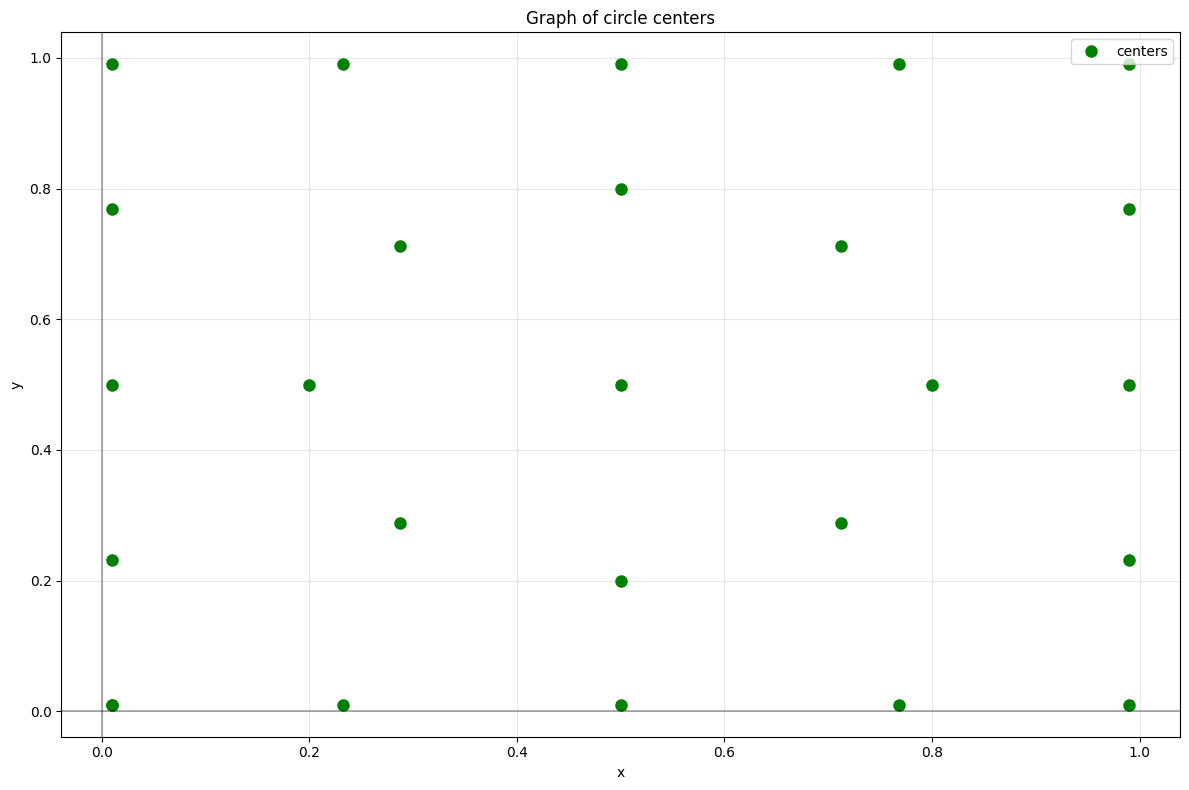

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

n = 26
centers = np.zeros((n, 2))

# Place circles in a structured pattern
# First, place a large circle in the center
centers[0] = [0.5, 0.5]

# Place 8 circles around it in a ring
for i in range(8):
    angle = 2 * np.pi * i / 8
    centers[i + 1] = [0.5 + 0.3 * np.cos(angle), 0.5 + 0.3 * np.sin(angle)]

# Place 16 more circles in an outer ring
for i in range(16):
    angle = 2 * np.pi * i / 16
    centers[i + 9] = [0.5 + 0.7 * np.cos(angle), 0.5 + 0.7 * np.sin(angle)]

# Clip to ensure everything is inside the unit square
centers = np.clip(centers, 0.01, 0.99)

# Create the plot
plt.figure(figsize=(12, 8))

# Plot both functions
plt.plot(centers[:, 0], centers[:, 1], 'go', markersize=8, label='centers')

# Add grid
plt.grid(True, alpha=0.3)

# Add labels and title
plt.xlabel('x')
plt.ylabel('y')
plt.title('Graph of circle centers')
plt.legend()

# Add horizontal and vertical lines at origin
plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)

# Show the plot
plt.tight_layout()
plt.show()

In [13]:
def compute_max_radii(centers):
    """
    Compute the maximum possible radii for each circle position
    such that they don't overlap and stay within the unit square.

    Args:
        centers: np.array of shape (n, 2) with (x, y) coordinates

    Returns:
        np.array of shape (n) with radius of each circle
    """
    n = centers.shape[0]
    radii = np.ones(n)

    # First, limit by distance to square borders
    for i in range(n):
        x, y = centers[i]
        # Distance to borders
        radii[i] = min(x, y, 1 - x, 1 - y)

    # Then, limit by distance to other circles
    # Each pair of circles with centers at distance d can have
    # sum of radii at most d to avoid overlap
    for i in range(n):
        for j in range(i + 1, n):
            dist = np.sqrt(np.sum((centers[i] - centers[j]) ** 2))

            # If current radii would cause overlap
            if radii[i] + radii[j] > dist:
                # Scale both radii proportionally
                scale = dist / (radii[i] + radii[j])
                radii[i] *= scale
                radii[j] *= scale

    return radii